# Getting ready with Dataframes

In [1]:
import json
import csv
import pandas as pd
outfile = open("reviews.tsv", 'w')
sfile = csv.writer(outfile, delimiter ="\t", quoting=csv.QUOTE_MINIMAL)
sfile.writerow(['business_id','stars', 'text'])
with open('review.json', encoding="utf-8") as f:

    for line in f:

        row = json.loads(line)

        # some special char must be encoded in 'utf-8'

        sfile.writerow([row['business_id'], row['stars'], (row['text']).encode('utf-8')])
        
outfile.close()
df_r= pd.read_csv('reviews.tsv', delimiter ="\t", encoding="utf-8")


In [2]:
df_r.head()

,business_id,stars,text
0,ujmEBvifdJM6h6RLv4wQIg,1.0,b'Total bill for this horrible service? Over $...
1,NZnhc2sEQy3RmzKTZnqtwQ,5.0,"b""I *adore* Travis at the Hard Rock's new Kell..."
2,WTqjgwHlXbSFevF32_DJVw,5.0,"b""I have to say that this office really has it..."
3,ikCg8xy5JIg_NGPx-MSIDA,5.0,"b""Went in for a lunch. Steak sandwich was deli..."
4,b1b1eb3uo-w561D0ZfCEiQ,1.0,b'Today was my second out of three sessions I ...


In [3]:
import json
import csv
import pandas as pd
outfile_1 = open("business_1.tsv", 'w')
sfile_1 = csv.writer(outfile_1, delimiter ="\t", quoting=csv.QUOTE_MINIMAL)
sfile_1.writerow(['business_id','stars', 'review_count'])
with open('business.json', encoding="utf-8") as f:

    for line in f:

        row = json.loads(line)

        # some special char must be encoded in 'utf-8'

        sfile_1.writerow([row['business_id'], row['stars'], row['review_count']])
        
outfile_1.close()
df_b = pd.read_csv('business_1.tsv', delimiter ="\t", encoding="utf-8")

In [4]:
df_b.head()

,business_id,stars,review_count
0,1SWheh84yJXfytovILXOAQ,3.0,5
1,QXAEGFB4oINsVuTFxEYKFQ,2.5,128
2,gnKjwL_1w79qoiV3IC_xQQ,4.0,170
3,xvX2CttrVhyG2z1dFg_0xw,5.0,3
4,HhyxOkGAM07SRYtlQ4wMFQ,4.0,4


In [5]:
df_c = df_b[~df_b.business_id.isin(['YSilq0Was9b4Q7oId_gUUw', 'Pah1N0Di1WA3wsI5TYkY7w', 'W6q7CANl3UbQa5hGCYU5OQ'])]

In [6]:
x1 = set(df_r.business_id) 
y1 = set(df_c.business_id)

z1 = y1 - x1
print(z1)

set()


In [7]:
df_review_agg = df_r.groupby('business_id')['text'].sum()

In [8]:
df_review_agg.head()


business_id
--1UhMGODdWsrMastO9DZw    b'If you are looking for authentic Mexican str...
--6MefnULPED_I942VcFNA    b"They have the best Chinese BBQ Pork (Char Si...
--7zmmkVg-IMGaXbuVd0SQ    b"I'm a tad reluctant to write a review as I r...
--8LPVSo5i0Oo61X01sV9A    b'Dr. LaCognata is great.  He is a great liste...
--9QQLMTbFzLJ_oT-ON3Xw    b'Always great customer service. Affordable ha...
Name: text, dtype: object

In [9]:
df_ready_for_sklearn = pd.DataFrame({'business_id': df_review_agg.index, 'all_reviews': df_review_agg.values})

In [10]:
df_ready_for_sklearn.head()

,all_reviews,business_id
0,b'If you are looking for authentic Mexican str...,--1UhMGODdWsrMastO9DZw
1,"b""They have the best Chinese BBQ Pork (Char Si...",--6MefnULPED_I942VcFNA
2,"b""I'm a tad reluctant to write a review as I r...",--7zmmkVg-IMGaXbuVd0SQ
3,b'Dr. LaCognata is great. He is a great liste...,--8LPVSo5i0Oo61X01sV9A
4,b'Always great customer service. Affordable ha...,--9QQLMTbFzLJ_oT-ON3Xw


In [11]:
df_merge = pd.merge(df_c,df_ready_for_sklearn, on ="business_id")

In [12]:
df_merge.head()

,business_id,stars,review_count,all_reviews
0,1SWheh84yJXfytovILXOAQ,3.0,5,"b""Don't go here if you expect consistent or re..."
1,QXAEGFB4oINsVuTFxEYKFQ,2.5,128,b'My girlfriend and I went for dinner at Emera...
2,gnKjwL_1w79qoiV3IC_xQQ,4.0,170,b'Husband was craving Chicken Teriyaki & gyoza...
3,xvX2CttrVhyG2z1dFg_0xw,5.0,3,b'The associates at this agency are absolutely...
4,HhyxOkGAM07SRYtlQ4wMFQ,4.0,4,"b""Great customer service and great job every t..."


# Z Score 

In [13]:
from scipy.stats import zscore

df_merge['normal_review_count'] = zscore(df_merge['review_count'])
df_merge[:10]

,business_id,stars,review_count,all_reviews,normal_review_count
0,1SWheh84yJXfytovILXOAQ,3.0,5,"b""Don't go here if you expect consistent or re...",-0.259129
1,QXAEGFB4oINsVuTFxEYKFQ,2.5,128,b'My girlfriend and I went for dinner at Emera...,0.857675
2,gnKjwL_1w79qoiV3IC_xQQ,4.0,170,b'Husband was craving Chicken Teriyaki & gyoza...,1.239022
3,xvX2CttrVhyG2z1dFg_0xw,5.0,3,b'The associates at this agency are absolutely...,-0.277288
4,HhyxOkGAM07SRYtlQ4wMFQ,4.0,4,"b""Great customer service and great job every t...",-0.268208
5,68dUKd8_8liJ7in4aWOSEA,2.5,3,b'horrible. do not go. staff is dishonest and...,-0.277288
6,5JucpCfHZltJh5r1JabjDg,3.5,7,b'OK place- I\'ve gone for a couple of years a...,-0.240969
7,gbQN7vr_caG_A1ugSmGhWg,3.5,3,"b'My stylist, Maria, listened to me carefully ...",-0.277288
8,Y6iyemLX_oylRpnr38vgMA,5.0,8,b'My nail girl is renting station at this plac...,-0.231890
9,4GBVPIYRvzGh4K4TkRQ_rw,4.5,8,"b""I've always had an excellent experience at O...",-0.231890


#  MinMax for MNB

In [14]:
mini_count= df_merge['review_count'].min()
maxi_count= df_merge['review_count'].max()
df_merge['normal_min_max_review_count'] = ((df_merge['review_count']-mini_count)/(maxi_count-mini_count))

In [15]:
df_merge[:10]

,business_id,stars,review_count,all_reviews,normal_review_count,normal_min_max_review_count
0,1SWheh84yJXfytovILXOAQ,3.0,5,"b""Don't go here if you expect consistent or re...",-0.259129,0.000240
1,QXAEGFB4oINsVuTFxEYKFQ,2.5,128,b'My girlfriend and I went for dinner at Emera...,0.857675,0.014979
2,gnKjwL_1w79qoiV3IC_xQQ,4.0,170,b'Husband was craving Chicken Teriyaki & gyoza...,1.239022,0.020012
3,xvX2CttrVhyG2z1dFg_0xw,5.0,3,b'The associates at this agency are absolutely...,-0.277288,0.000000
4,HhyxOkGAM07SRYtlQ4wMFQ,4.0,4,"b""Great customer service and great job every t...",-0.268208,0.000120
5,68dUKd8_8liJ7in4aWOSEA,2.5,3,b'horrible. do not go. staff is dishonest and...,-0.277288,0.000000
6,5JucpCfHZltJh5r1JabjDg,3.5,7,b'OK place- I\'ve gone for a couple of years a...,-0.240969,0.000479
7,gbQN7vr_caG_A1ugSmGhWg,3.5,3,"b'My stylist, Maria, listened to me carefully ...",-0.277288,0.000000
8,Y6iyemLX_oylRpnr38vgMA,5.0,8,b'My nail girl is renting station at this plac...,-0.231890,0.000599
9,4GBVPIYRvzGh4K4TkRQ_rw,4.5,8,"b""I've always had an excellent experience at O...",-0.231890,0.000599


In [16]:
df_merge.all_reviews = df_merge.all_reviews.apply(lambda x: x.lower()) #convert text to lower case

In [17]:
df_combine = df_merge[(df_merge.review_count>50) & (df_merge.review_count<3000)]

In [18]:
df_combine.all_reviews = df_combine.all_reviews.replace(r'\\n','', regex=True) 

C:\Users\Mardavkumar\Anaconda3\envs\py35\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [19]:
df_combine.shape

(26489, 6)

In [20]:
df_combine['all_reviews'] = df_combine['all_reviews'].str.replace('[^\w\s]','') #removing punctuation 

C:\Users\Mardavkumar\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
df_combine[:10]

,business_id,stars,review_count,all_reviews,normal_review_count,normal_min_max_review_count
1,QXAEGFB4oINsVuTFxEYKFQ,2.5,128,bmy girlfriend and i went for dinner at emeral...,0.857675,0.014979
2,gnKjwL_1w79qoiV3IC_xQQ,4.0,170,bhusband was craving chicken teriyaki gyoza s...,1.239022,0.020012
22,KWywu2tTEPWmR9JnBc0WyQ,4.0,107,bits awesome herethe guys are soooo hot and ni...,0.667001,0.012463
25,tstimHoMcYbkSC4eBA1wEg,4.5,184,bwe found out about this gem from the mans cow...,1.366138,0.021690
28,iojTeSaoPuxm4WeCzDUA6w,4.5,52,bi got into a parking lot accident with my 201...,0.167617,0.005872
29,NDuUMJfrWk52RA-H-OtrpA,3.0,57,bpretty solid vegan spot had a rice bowl there...,0.213016,0.006471
47,GWO87Y-IqL54_Ijx6hTYAQ,4.5,57,bim not sure how you can rate a classic ice cr...,0.213016,0.006471
52,viivlh_KJkiDVxhIdZnV8Q,2.5,64,bfirst time here 1152017 to see entombed ad pl...,0.276574,0.007310
53,q2KtxnPa6rPSpAlMbg9l8g,4.0,174,bi loved my little cake but the owner is her o...,1.275341,0.020491
66,dQj5DLZjeDK3KFysh1SYOQ,4.5,242,bit doesnt get more kooky than meatless easter...,1.892761,0.028640


In [22]:
df_combine['all_reviews'] = df_combine['all_reviews'].str[1:] 

C:\Users\Mardavkumar\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
df_combine[:10]

,business_id,stars,review_count,all_reviews,normal_review_count,normal_min_max_review_count
1,QXAEGFB4oINsVuTFxEYKFQ,2.5,128,my girlfriend and i went for dinner at emerald...,0.857675,0.014979
2,gnKjwL_1w79qoiV3IC_xQQ,4.0,170,husband was craving chicken teriyaki gyoza so...,1.239022,0.020012
22,KWywu2tTEPWmR9JnBc0WyQ,4.0,107,its awesome herethe guys are soooo hot and nic...,0.667001,0.012463
25,tstimHoMcYbkSC4eBA1wEg,4.5,184,we found out about this gem from the mans cowo...,1.366138,0.021690
28,iojTeSaoPuxm4WeCzDUA6w,4.5,52,i got into a parking lot accident with my 2011...,0.167617,0.005872
29,NDuUMJfrWk52RA-H-OtrpA,3.0,57,pretty solid vegan spot had a rice bowl there ...,0.213016,0.006471
47,GWO87Y-IqL54_Ijx6hTYAQ,4.5,57,im not sure how you can rate a classic ice cre...,0.213016,0.006471
52,viivlh_KJkiDVxhIdZnV8Q,2.5,64,first time here 1152017 to see entombed ad ple...,0.276574,0.007310
53,q2KtxnPa6rPSpAlMbg9l8g,4.0,174,i loved my little cake but the owner is her ow...,1.275341,0.020491
66,dQj5DLZjeDK3KFysh1SYOQ,4.5,242,it doesnt get more kooky than meatless eastern...,1.892761,0.028640


In [24]:
df_combine['all_reviews'] = df_combine['all_reviews'].str.replace('\d+', '') #removing digits

C:\Users\Mardavkumar\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [25]:
df_combine[:20]

,business_id,stars,review_count,all_reviews,normal_review_count,normal_min_max_review_count
1,QXAEGFB4oINsVuTFxEYKFQ,2.5,128,my girlfriend and i went for dinner at emerald...,0.857675,0.014979
2,gnKjwL_1w79qoiV3IC_xQQ,4.0,170,husband was craving chicken teriyaki gyoza so...,1.239022,0.020012
22,KWywu2tTEPWmR9JnBc0WyQ,4.0,107,its awesome herethe guys are soooo hot and nic...,0.667001,0.012463
25,tstimHoMcYbkSC4eBA1wEg,4.5,184,we found out about this gem from the mans cowo...,1.366138,0.021690
28,iojTeSaoPuxm4WeCzDUA6w,4.5,52,i got into a parking lot accident with my cad...,0.167617,0.005872
29,NDuUMJfrWk52RA-H-OtrpA,3.0,57,pretty solid vegan spot had a rice bowl there ...,0.213016,0.006471
47,GWO87Y-IqL54_Ijx6hTYAQ,4.5,57,im not sure how you can rate a classic ice cre...,0.213016,0.006471
52,viivlh_KJkiDVxhIdZnV8Q,2.5,64,first time here to see entombed ad plenty of ...,0.276574,0.007310
53,q2KtxnPa6rPSpAlMbg9l8g,4.0,174,i loved my little cake but the owner is her ow...,1.275341,0.020491
66,dQj5DLZjeDK3KFysh1SYOQ,4.5,242,it doesnt get more kooky than meatless eastern...,1.892761,0.028640


# TF-IDF Vectorizer

In [26]:
import sklearn.feature_extraction.text as sk_text

vectorizer = sk_text.TfidfVectorizer(stop_words = 'english', max_features = 1000, min_df=1)

matrix = vectorizer.fit_transform(df_combine.all_reviews)


In [27]:
print(vectorizer.get_feature_names())

['able', 'absolutely', 'accommodating', 'actual', 'actually', 'add', 'added', 'addition', 'affordable', 'afternoon', 'ago', 'ahead', 'air', 'airport', 'amazing', 'ambiance', 'american', 'apparently', 'appetizer', 'appetizers', 'apple', 'appointment', 'appreciate', 'area', 'arent', 'arrived', 'asian', 'ask', 'asked', 'asking', 'ate', 'atmosphere', 'attention', 'attentive', 'attitude', 'authentic', 'available', 'average', 'avocado', 'avoid', 'away', 'awesome', 'awful', 'baby', 'bacon', 'bad', 'bag', 'baked', 'bar', 'barely', 'bartender', 'bartenders', 'based', 'basic', 'basically', 'bathroom', 'bbq', 'bean', 'beans', 'beat', 'beautiful', 'bed', 'beef', 'beer', 'beers', 'believe', 'belly', 'best', 'better', 'big', 'birthday', 'bit', 'bite', 'black', 'bland', 'blue', 'book', 'bottle', 'bought', 'bowl', 'box', 'boyfriend', 'bread', 'breakfast', 'bring', 'brisket', 'broth', 'brought', 'brunch', 'bucks', 'buffet', 'building', 'bun', 'bunch', 'burger', 'burgers', 'burrito', 'business', 'busy',

# Getting X ready for Modeling

In [28]:
a_1 = matrix.toarray()

In [29]:
normal_review_count = df_combine['normal_review_count'].tolist()

In [30]:
import numpy as np
a_2 = np.asarray([ np.asarray(normal_review_count)])

In [31]:
a_1.shape

(26489, 1000)

In [32]:
print(a_2)

[[0.85767481 1.23902236 0.66700103 ... 0.72147925 0.94847185 3.69962207]]


In [33]:
a_3 = np.concatenate((a_1,a_2.T), axis=1)

In [34]:
print(a_3)

[[1.76239315e-03 1.37903267e-02 0.00000000e+00 ... 0.00000000e+00
  2.27704169e-03 8.57674809e-01]
 [1.95343096e-03 6.68725495e-03 1.36486318e-03 ... 0.00000000e+00
  5.04773153e-03 1.23902236e+00]
 [2.34507159e-02 2.86713332e-03 8.19251342e-03 ... 0.00000000e+00
  0.00000000e+00 6.67001032e-01]
 ...
 [1.73733415e-03 8.49640354e-03 7.28325740e-03 ... 2.05236983e-02
  2.24466504e-03 7.21479254e-01]
 [3.48847672e-03 1.02362021e-02 4.87480083e-03 ... 0.00000000e+00
  0.00000000e+00 9.48471846e-01]
 [2.10657274e-02 2.06043174e-02 1.15964997e-02 ... 1.07730022e-03
  3.29906368e-03 3.69962207e+00]]


In [35]:
x = a_3

## Getting x ready for mnb

In [36]:
normal_min_max_review_count = df_combine['normal_min_max_review_count'].tolist()

import numpy as np
a_4 = np.asarray([ np.asarray(normal_min_max_review_count)])
x_mnb = np.concatenate((a_1,a_4.T), axis=1)

In [37]:
print(x.shape)
print(x_mnb.shape)

(26489, 1001)
(26489, 1001)


# Making Y ready for Modeling

In [38]:
y_list = df_combine['stars'].tolist()

In [39]:
y = y_list

In [40]:
import numpy as np
y = np.asarray(y_list)

In [41]:
print(y.shape)

(26489,)


In [42]:
print(type(y))

<class 'numpy.ndarray'>


In [43]:
y[:10]

array([2.5, 4. , 4. , 4.5, 4.5, 3. , 4.5, 2.5, 4. , 4.5])

# Splitting Data for Training & Testing

## Making Y ready for Modeling

In [44]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

#le.fit(y)

normal_y = le.fit_transform(y)
le.classes_

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

## Splitting data for linear regression

In [45]:
import numpy as np
from sklearn.model_selection import train_test_split

x_train_lin, x_test_lin, y_train_lin, y_test_lin = train_test_split(x, y, test_size = 0.30, random_state = 42)

## Splitting Data for mnb

In [46]:
import numpy as np
from sklearn.model_selection import train_test_split

x_train_mnb, x_test_mnb, y_train_mnb, y_test_mnb = train_test_split(x_mnb, normal_y, test_size = 0.30, random_state = 42)

## Splitting Data for other models

In [47]:
import numpy as np
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, normal_y, test_size = 0.30, random_state = 42)

In [48]:
y_train.shape

(18542,)

## Linear Regression

In [49]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(x_train_lin, y_train_lin)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [50]:
from sklearn import metrics

y_pred_lir = lin_reg.predict(x_test_lin)

print("test", y_test_lin[:20])
print("pred", y_pred_lir[:20])

print("R2 score:",metrics.r2_score(y_test_lin,y_pred_lir))
print("RMSE::   ",np.sqrt(metrics.mean_squared_error(y_test_lin, y_pred_lir)))
print("MSE:     ", metrics.mean_squared_error(y_test_lin, y_pred_lir))

test [3.5 4.5 4.5 4.  4.  4.5 3.5 3.5 3.  2.5 4.  3.  5.  3.5 3.5 3.  5.  3.5
 3.5 3.5]
pred [3.47730107 4.09572381 4.1952994  4.16872798 3.70986891 4.38389364
 3.51106081 3.8026315  3.36679417 3.15890803 3.98987007 3.0044521
 4.45274122 3.60345822 3.54591494 2.90740066 4.87660119 3.45648866
 3.58317074 3.8244408 ]
R2 score: 0.8619465860546074
RMSE::    0.2584731801692166
MSE:      0.06680838486678832


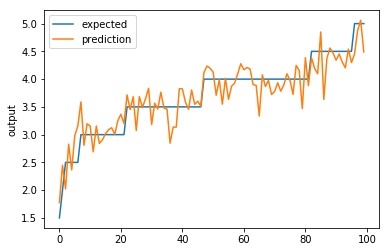

In [81]:
import matplotlib.pyplot as plt

def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()
chart_regression(y_pred_lir[:100],y_test_lin[:100])

## Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

y_pred_log = log_reg.predict(x_test)

C:\Users\Mardavkumar\Anaconda3\envs\py35\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mardavkumar\Anaconda3\envs\py35\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [53]:
from sklearn import metrics

y_pred_log = log_reg.predict(x_test)

print("test", y_test[:20])
print("pred", y_pred_log[:20])


print(metrics.confusion_matrix(y_test,y_pred_log))
print("Precision Score:: ",metrics.precision_score(y_test,y_pred_log,average='weighted'))   
print("Recall Score:: ",metrics.recall_score(y_test,y_pred_log,average='weighted'))      
print("F1 Score:: ",metrics.f1_score(y_test,y_pred_log,average='weighted'))

test [5 7 7 6 6 7 5 5 4 3 6 4 8 5 5 4 8 5 5 5]
pred [6 6 6 6 5 7 5 6 5 5 6 5 7 5 5 4 7 5 5 6]
[[   0    2    0    0    1    0    0    0    0]
 [   0   22   17   26    4    0    0    0    0]
 [   0    8   22   67   63    5    0    0    0]
 [   0    1    7   68  265  106    7    0    0]
 [   0    1    1   13  329  704   54    3    0]
 [   0    0    2    3   76 1202  661   33    1]
 [   0    0    0    1   11  272 1844  226    3]
 [   0    0    0    0    0    9  603  820   33]
 [   0    0    0    0    0    0    6  238  107]]
Precision Score::  0.5476235759235792
Recall Score::  0.5554297219076381
F1 Score::  0.5349300870306978


C:\Users\Mardavkumar\Anaconda3\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Mardavkumar\Anaconda3\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


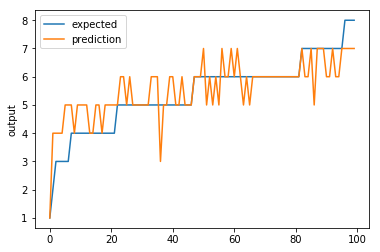

In [80]:
import matplotlib.pyplot as plt

def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()
chart_regression(y_pred_log[:100],y_test[:100])

## MNB

In [55]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(x_train_mnb, y_train_mnb)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [56]:
y_pred = mnb.predict(x_test_mnb)

print("test", y_test_mnb[:10])
print("pred", y_pred[:10])

print(metrics.confusion_matrix(y_test_mnb,y_pred))
print("Precision Score:: ",metrics.precision_score(y_test_mnb,y_pred,average='weighted'))   
print("Recall Score:: ",metrics.recall_score(y_test_mnb,y_pred,average='weighted'))      
print("F1 Score:: ",metrics.f1_score(y_test_mnb,y_pred,average='weighted'))

test [5 7 7 6 6 7 5 5 4 3]
pred [6 6 6 6 6 7 7 6 5 6]
[[   0    2    0    0    1    0    0    0    0]
 [   0   25   16   14    8    3    0    0    3]
 [   0    7   50   24   27   45    2    2    8]
 [   0    3   56   50   75  201   17   15   37]
 [   0    0   32   53   63  632  196   58   71]
 [   0    1    6   26   57  673  927  166  122]
 [   0    0    3    6   21  175 1657  295  200]
 [   0    0    2    0    6    9  771  355  322]
 [   0    0    0    0    0    1   35   70  245]]
Precision Score::  0.37395139752362344
Recall Score::  0.39234931420661884
F1 Score::  0.35718244376328223


C:\Users\Mardavkumar\Anaconda3\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Mardavkumar\Anaconda3\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


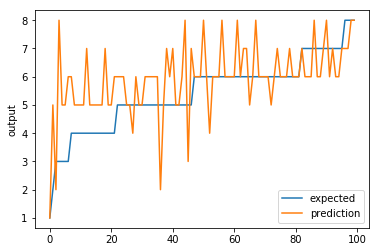

In [78]:
import matplotlib.pyplot as plt

def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()
chart_regression(y_pred[:100],y_test_mnb[:100])

## KNN

In [58]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [59]:
y_pred_knn = knn.predict(x_test)

print("test", y_test[:10])
print("pred", y_pred_knn[:10])

print(metrics.confusion_matrix(y_test,y_pred_knn))
print("Precision Score:: ",metrics.precision_score(y_test,y_pred_knn,average='weighted'))   
print("Recall Score:: ",metrics.recall_score(y_test,y_pred_knn,average='weighted'))      
print("F1 Score:: ",metrics.f1_score(y_test,y_pred_knn,average='weighted'))

test [5 7 7 6 6 7 5 5 4 3]
pred [4 7 6 6 5 6 5 6 4 4]
[[  1   1   0   1   0   0   0   0   0]
 [ 10  22  23   7   5   1   1   0   0]
 [  0  14  60  47  30   9   5   0   0]
 [  1  14  59 150 156  55  18   1   0]
 [  0   5  51 203 410 323  98  15   0]
 [  1  10  15 129 475 767 508  70   3]
 [  0   1   5  65 271 774 999 231  11]
 [  0   0   5  15  74 283 565 458  65]
 [  0   1   3   4   9  21  65 141 107]]
Precision Score::  0.3963760224638631
Recall Score::  0.3742292689065056
F1 Score::  0.3777788065032237


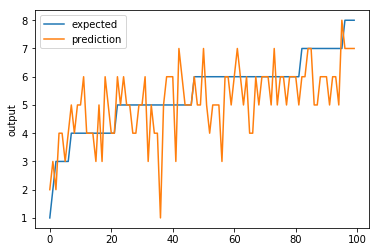

In [74]:
import matplotlib.pyplot as plt

def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()
chart_regression(y_pred_knn[:100],y_test[:100])

## SVM 

In [61]:
from sklearn.svm import SVC

svm = SVC(C=10.0,kernel='linear')
svm.fit(x_train,y_train)

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [62]:
from sklearn import metrics

y_pred_svm = svm.predict(x_test)

print("test", y_test[:20])
print("pred", y_pred_svm[:20])


print(metrics.confusion_matrix(y_test,y_pred_svm))
print("Precision Score:: ",metrics.precision_score(y_test,y_pred_svm,average='weighted'))   
print("Recall Score:: ",metrics.recall_score(y_test,y_pred_svm,average='weighted'))      
print("F1 Score:: ",metrics.f1_score(y_test,y_pred_svm,average='weighted'))

test [5 7 7 6 6 7 5 5 4 3 6 4 8 5 5 4 8 5 5 5]
pred [5 6 7 7 5 7 5 6 5 4 6 5 7 5 5 3 7 5 5 5]
[[   1    1    1    0    0    0    0    0    0]
 [   6   34   28    1    0    0    0    0    0]
 [   0   12   87   64    2    0    0    0    0]
 [   0    1   32  291  127    3    0    0    0]
 [   0    0    4   86  729  284    1    1    0]
 [   0    0    0    5  193 1479  298    3    0]
 [   0    0    0    0    5  285 1865  201    1]
 [   0    0    0    0    0    3  304 1094   64]
 [   0    0    0    0    0    0    1  139  211]]
Precision Score::  0.7285366308017849
Recall Score::  0.728702655089971
F1 Score::  0.7277356341254824


In [72]:
import matplotlib.pyplot as plt

def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()


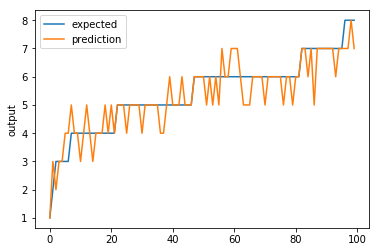

In [75]:
chart_regression(y_pred_svm[:100],y_test[:100])